<B/> <span style="font-family:Calibri; font-size:2em;"><font color="Blue"/> Problem Statement

<span style="font-family:Courier New; font-size:1.3em;">You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

<span style="font-family:Courier New; font-size:1.3em;">Dataset for Problem: Election_Data.xlsx

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Load the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import warnings
warnings.filterwarnings("ignore")

In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Load the Dataset

In [2]:
df=pd.read_excel("Election_Data.xlsx", sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df=df.drop('Unnamed: 0',axis=1)

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Shape of the dataset

In [5]:
df.shape

(1525, 9)

In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [7]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/>Type of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/><font color='green'/>Description of the dataset/EDA

In [9]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['age'].value_counts()

37    42
49    39
35    39
47    38
46    37
      ..
87     3
92     2
91     1
90     1
93     1
Name: age, Length: 70, dtype: int64

<span style="font-family:Courier New; font-size:1.3em;"><B/><U/><font color='green'/>Check if there is a missing values

In [12]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [13]:
df['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [14]:
df['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [15]:
df['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [16]:
df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [17]:
df['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [18]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

<span style="font-family:Courier New; font-size:1.3em;"><B/>Making different list for categorical columns and numerical columns

In [19]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="font-family:Courier New; font-size:1.3em;"><B/><font color='green'/>Unique values for categorical variables

In [21]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [22]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

<span style="font-family:Courier New; font-size:1.3em;"><B/><I/><Font color='Green'/>Checking the Duplicates

In [23]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [24]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))

Number of rows before discarding duplicates = 1525
Number of rows after discarding duplicates = 1517


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/><Font color='Green'/>Univariate and Bivariate Analysis

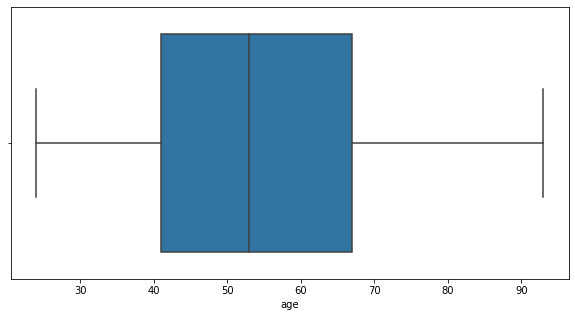

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(df.age)
plt.show()

In [26]:
df.age.mean()

54.2412656558998

In [27]:
df.age=df.age.fillna(54.24)

In [28]:
df.vote.mode()

0    Labour
dtype: object

In [29]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [30]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


<span style="font-family:Courier New; font-size:1.3em;"><B/><I/><Font color='Green'/>Univariate Analysis

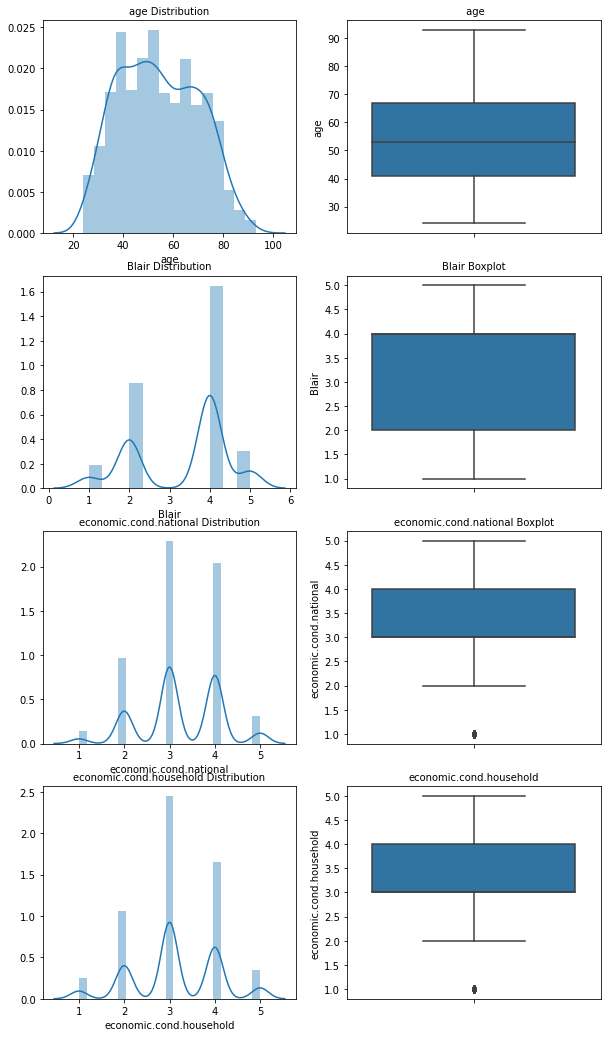

In [31]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age",fontsize=10)

a = sns.distplot(df['Blair'] , ax=axes[1][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[1][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.national'] , ax=axes[2][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[3][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[3][1])
a.set_title("economic.cond.household",fontsize=10)

plt.show()

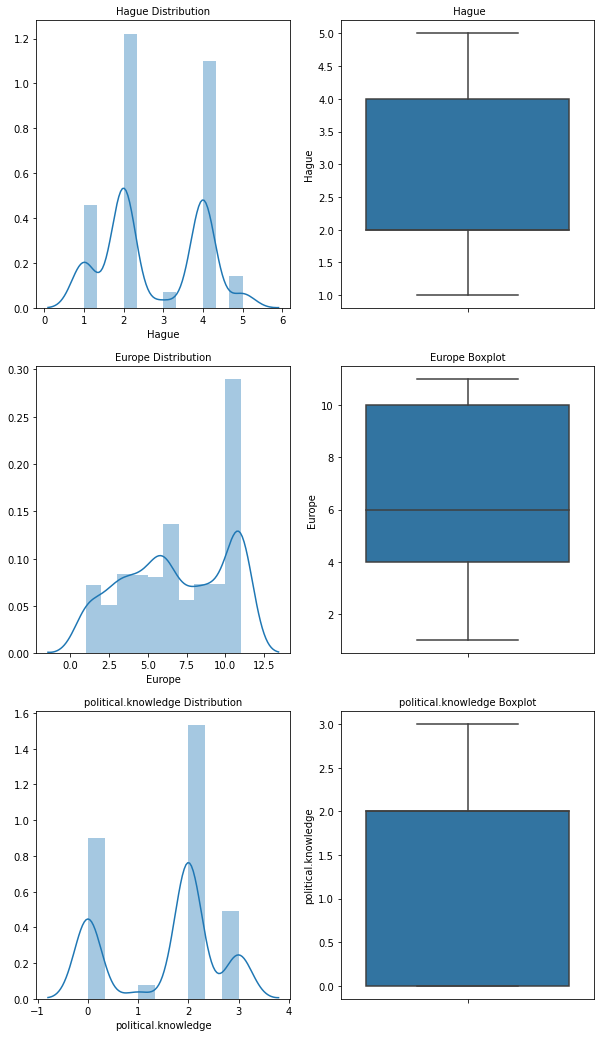

In [32]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title(" Hague",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'] , ax=axes[2][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()

<span style="font-family:Courier New; font-size:1.3em;"><B/><I/><Font color='Green'/>Bivariate and Multivariate Analysis

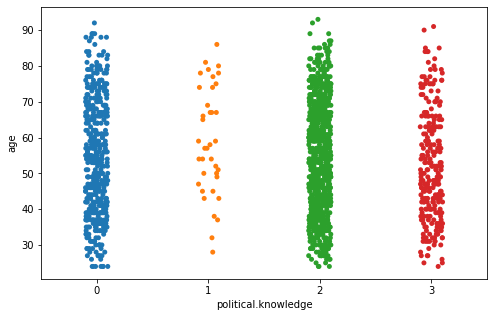

In [33]:
plt.figure(figsize=(8,5))
sns.stripplot(df["political.knowledge"], df['age'], jitter=True) 
plt.show()

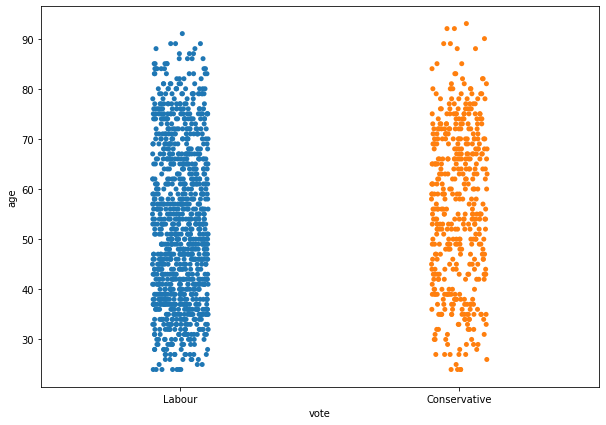

In [34]:
plt.figure(figsize=(10,7))
sns.stripplot(df["vote"], df['age'], jitter=True)  
plt.show()

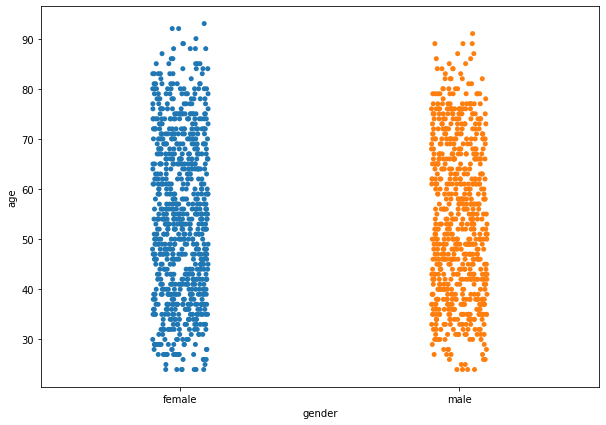

In [35]:
plt.figure(figsize=(10,7))
sns.stripplot(df["gender"], df['age'], jitter=True)  
plt.show()

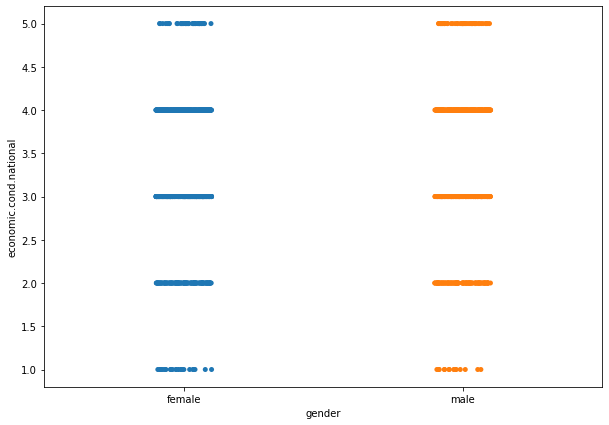

In [36]:
plt.figure(figsize=(10,7))
sns.stripplot(df["gender"], df['economic.cond.national'], jitter=True)  
plt.show()

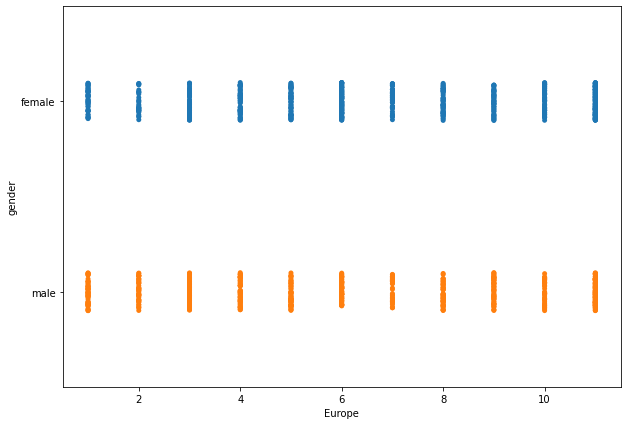

In [37]:
plt.figure(figsize=(10,7))
sns.stripplot(df["Europe"], df['gender'], jitter=True)  
plt.show()

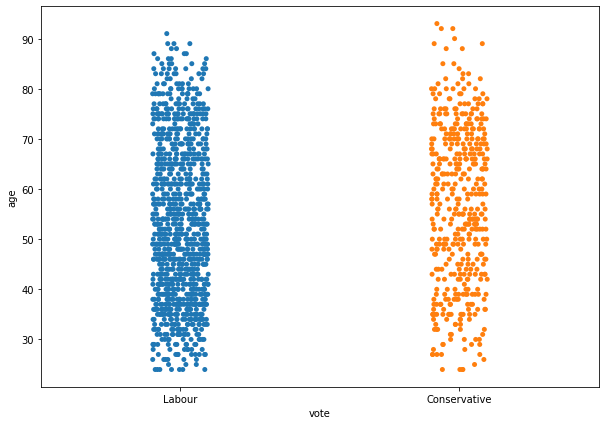

In [38]:
plt.figure(figsize=(10,7))
sns.stripplot(df["vote"], df['age'],hue_order='Europe', jitter=True)  
plt.show()

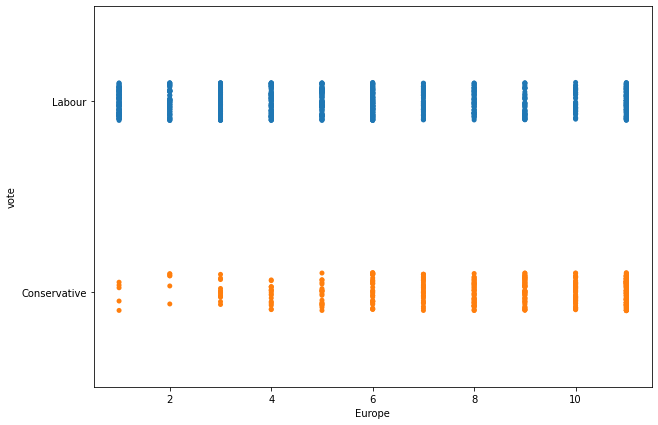

In [39]:
plt.figure(figsize=(10,7))
sns.stripplot(df["Europe"], df['vote'],hue_order='Gender', jitter=True)  
plt.show()

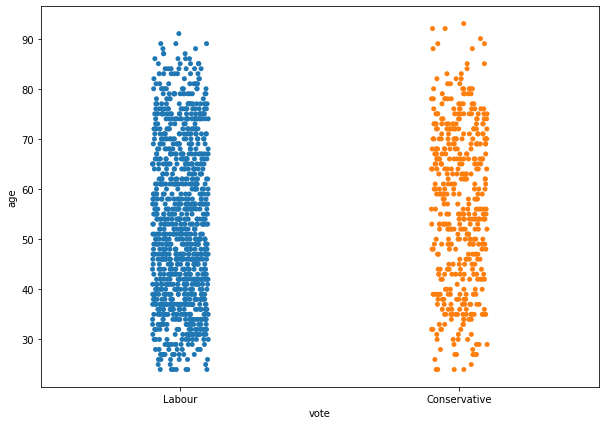

In [40]:
plt.figure(figsize=(10,7))
sns.stripplot(df["vote"], df['age'],hue_order='Hague', jitter=True)  
plt.show()

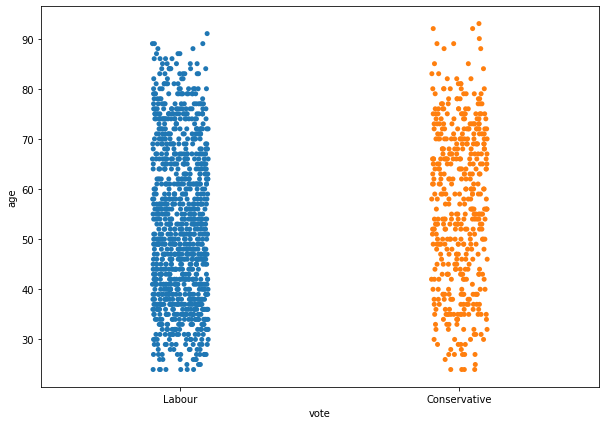

In [41]:
plt.figure(figsize=(10,7))
sns.stripplot(df["vote"], df['age'],hue_order='Blair', jitter=True)  
plt.show()

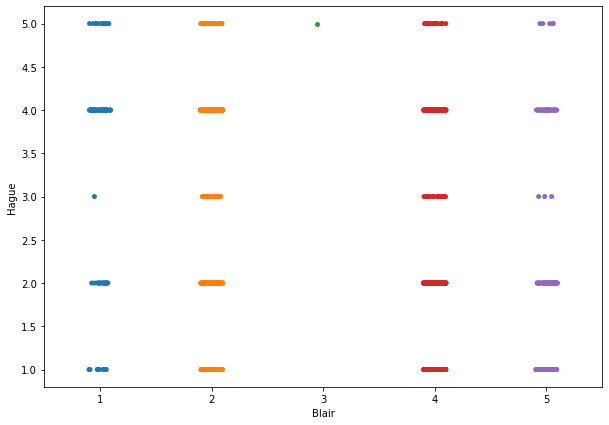

In [42]:
plt.figure(figsize=(10,7))
sns.stripplot(df["Blair"], df['Hague'],hue_order='age', jitter=True)  
plt.show()

In [43]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1517 non-null int8
age                        1517 non-null int64
economic.cond.national     1517 non-null int64
economic.cond.household    1517 non-null int64
Blair                      1517 non-null int64
Hague                      1517 non-null int64
Europe                     1517 non-null int64
political.knowledge        1517 non-null int64
gender                     1517 non-null int8
dtypes: int64(7), int8(2)
memory usage: 137.8 KB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:>

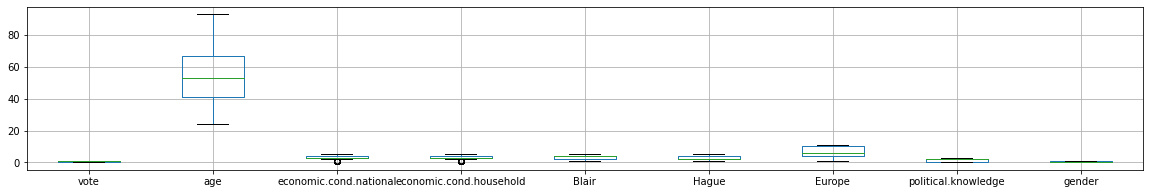

In [46]:
df.boxplot(figsize=(20,3))

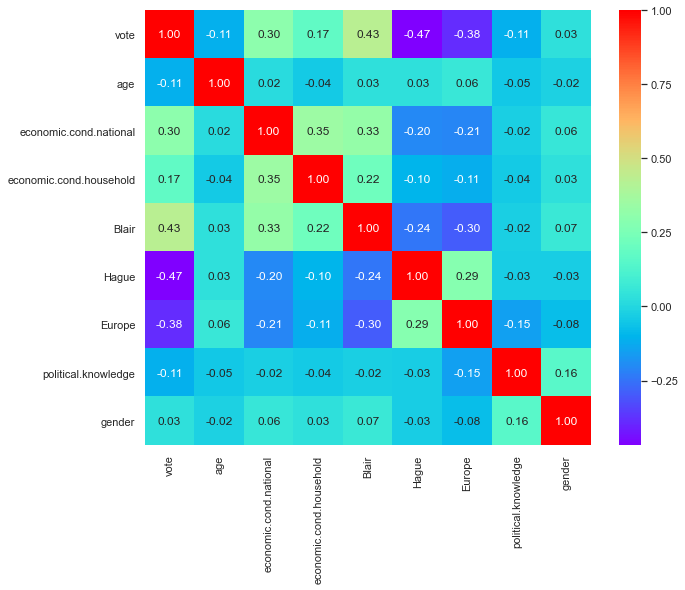

In [47]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

<span style="font-family:Courier New; font-size:1.3em;"><B/><I/><Font color='Green'/> Data Encoding

In [48]:
df = pd.get_dummies(df, columns=['gender'],drop_first=True)

In [49]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


<AxesSubplot:>

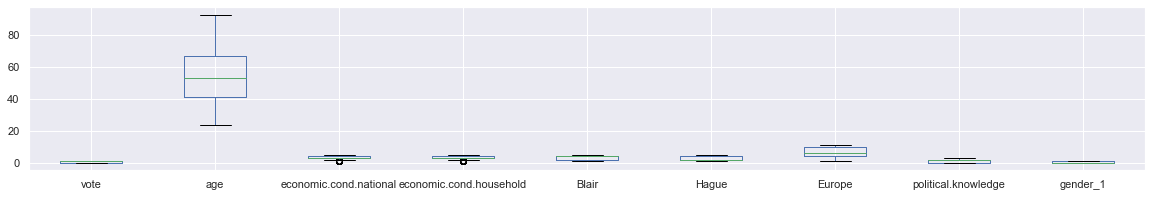

In [50]:
df.boxplot(figsize=(20,3))

In [51]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [52]:
for column in df.iloc[:, 2:4].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

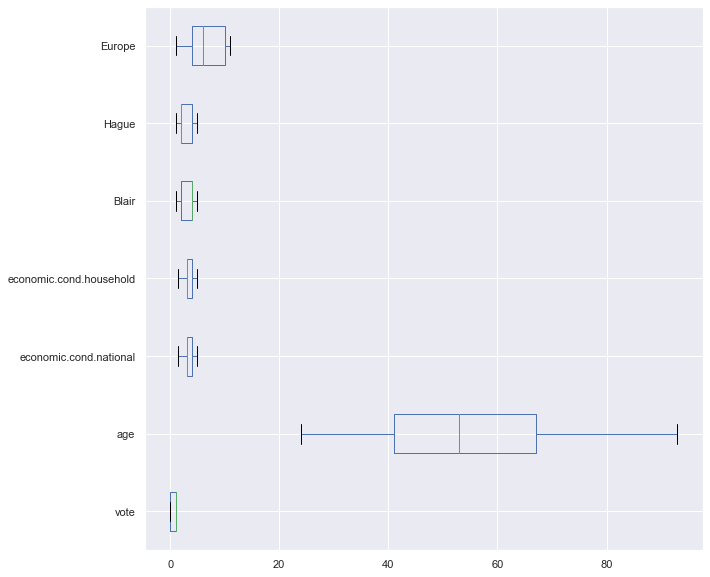

In [53]:
plt.figure(figsize=(10,10))
df.iloc[:, 0:7].boxplot(vert=0)

In [54]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.257416,0.853647,1.5,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.159196,0.886279,1.5,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender_1,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


In [55]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender_1'],
      dtype='object')

<span style="font-family:Courier New; font-size:1.3em;"><B/><I/><Font color='Green'/>Scaling the variables as continuous variables have different weightage using min-max technique

In [56]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [57]:
num1=['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

In [58]:
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [59]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
0,1,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0
1,1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1
2,1,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1
3,1,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0
4,1,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1


<span style="font-family:Courier New; font-size:1.3em;"><B/><U/><Font color='Green'/>Split the data into Test and Training

In [60]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [61]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_1
0,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0
1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1
2,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1
3,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0
4,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1


<span style="font-family:Courier New; font-size:1.3em;"><B/><I/><Font color='Green'/>Train & Test split

In [62]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [64]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [66]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [67]:
NB_metrics=classification_report(y_train, y_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision=round(df.loc["1"][1],2)
NB_train_recall=round(df.loc["1"][2],2)
NB_train_f1=round(df.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.89
NB_train_recall  0.88
NB_train_f1  0.88


In [68]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

AUC: 0.889


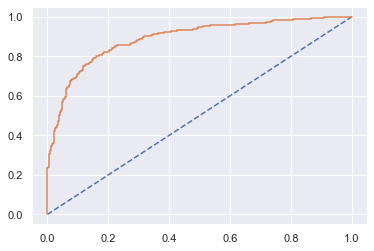

In [69]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [70]:
y_test.value_counts()

1    303
0    153
Name: vote, dtype: int64

In [71]:
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))c
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [135]:
NB_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][1],2)
NB_test_recall=round(df.loc["1"][2],2)
NB_test_f1=round(df.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.9
NB_test_recall  0.87
NB_test_f1  0.85


AUC: 0.876


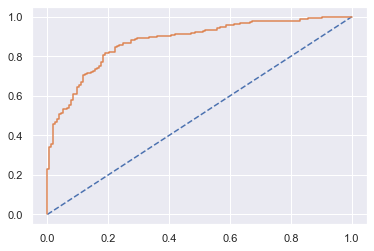

In [73]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.8369462770970783
[[193 114]
 [ 59 695]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [76]:
LR_metrics=classification_report(y_train, y_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_train_precision=round(df.loc["1"][1],2)
LR_train_recall=round(df.loc["1"][2],2)
LR_train_f1=round(df.loc["1"][0],2)
print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

LR_train_precision  0.92
LR_train_recall  0.89
LR_train_f1  0.86


AUC: 0.891


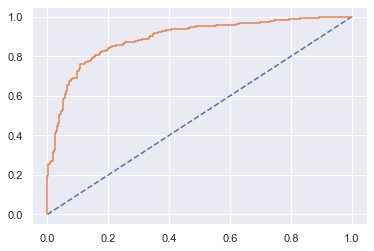

In [77]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [78]:
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8289473684210527
[[110  43]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [79]:
LR_metrics=classification_report(y_test, y_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_test_precision=round(df.loc["1"][1],2)
LR_test_recall=round(df.loc["1"][2],2)
LR_test_f1=round(df.loc["1"][0],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

LR_test_precision  0.88
LR_test_recall  0.87
LR_test_f1  0.86


AUC: 0.881


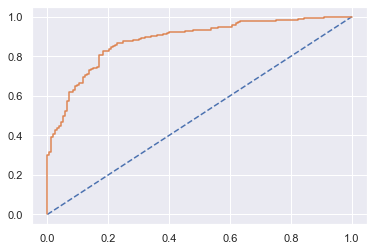

In [80]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>Decision Tree

In [81]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [82]:
y_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.793859649122807
[[103  50]
 [ 44 259]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       153
           1       0.84      0.85      0.85       303

    accuracy                           0.79       456
   macro avg       0.77      0.76      0.77       456
weighted avg       0.79      0.79      0.79       456



In [83]:
DT_metrics=classification_report(y_test, y_predict,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_test_precision=round(df.loc["1"][1],2)
DT_test_recall=round(df.loc["1"][2],2)
DT_test_f1=round(df.loc["1"][0],2)
print ('DT_test_precision ',DT_test_precision)
print ('DT_test_recall ',DT_test_recall)
print ('DT_test_f1 ',DT_test_f1)

DT_test_precision  0.85
DT_test_recall  0.85
DT_test_f1  0.84


AUC: 0.888


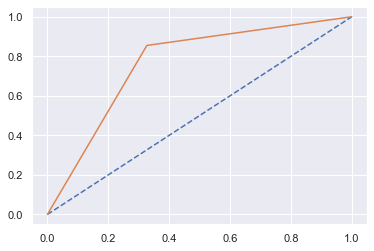

In [149]:
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [150]:
y_predict = clf.predict(X_train)
model_score = clf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [86]:
DT_metrics=classification_report(y_train, y_predict,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_train_precision=round(df.loc["1"][1],2)
DT_train_recall=round(df.loc["1"][2],2)
DT_train_f1=round(df.loc["1"][0],2)
print ('DT_train_precision ',DT_train_precision)
print ('DT_train_recall ',DT_train_recall)
print ('DT_train_f1 ',DT_train_f1)

DT_train_precision  1.0
DT_train_recall  1.0
DT_train_f1  1.0


AUC: 1.000


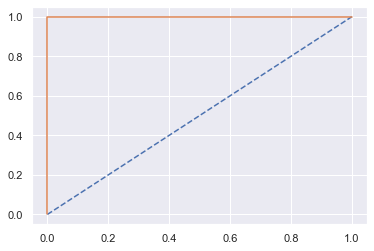

In [151]:
# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
clfKNN=KNeighborsClassifier()
clfKNN.fit(X_train,y_train)
y_pred=clfKNN.predict(X_train)
model_scoreKNN = clfKNN.score(X_train, y_train)
print(model_scoreKNN)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

0.8576814326107446
[[221  86]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       307
           1       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.86      0.86      0.86      1061



In [89]:
KNN_metrics=classification_report(y_train, y_pred,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df.loc["1"][1],2)
KNN_train_recall=round(df.loc["1"][2],2)
KNN_train_f1=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.91
KNN_train_recall  0.9
KNN_train_f1  0.89


AUC: 0.930


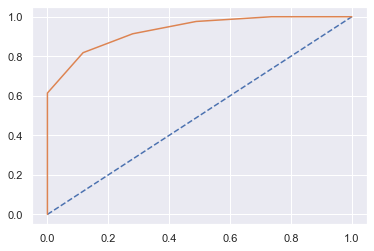

In [91]:
# predict probabilities
probs = clfKNN.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [92]:
y_pred=clfKNN.predict(X_test)
model_scoreKNN = clfKNN.score(X_test, y_test)
print(model_scoreKNN)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8267543859649122
[[108  45]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



In [93]:
KNN_metrics=classification_report(y_test, y_pred,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df.loc["1"][1],2)
KNN_test_recall=round(df.loc["1"][2],2)
KNN_test_f1=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.89
KNN_test_recall  0.87
KNN_test_f1  0.86


AUC: 0.876


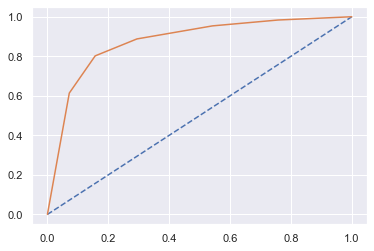

In [94]:
# predict probabilities
probs = clfKNN.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>SVM

In [95]:
from sklearn import svm
clfSVM = svm.SVC()
clfSVM.fit(X_train, y_train)
y_pred=clfSVM.predict(X_train)
model_scoreSVM = clfSVM.score(X_train, y_train)
print(model_scoreSVM)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

0.8360037700282752
[[194 113]
 [ 61 693]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [96]:
SVM_metrics=classification_report(y_train, y_pred,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()
SVM_train_precision=round(df.loc["1"][1],2)
SVM_train_recall=round(df.loc["1"][2],2)
SVM_train_f1=round(df.loc["1"][0],2)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

SVM_train_precision  0.92
SVM_train_recall  0.89
SVM_train_f1  0.86


In [97]:
y_pred=clfSVM.predict(X_test)
model_scoreSVM = clfSVM.score(X_test, y_test)
print(model_scoreSVM)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8421052631578947
[[109  44]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       153
           1       0.86      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



In [98]:
SVM_metrics=classification_report(y_test, y_pred,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()
SVM_test_precision=round(df.loc["1"][1],2)
SVM_test_recall=round(df.loc["1"][2],2)
SVM_test_f1=round(df.loc["1"][0],2)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_precision  0.91
SVM_test_recall  0.88
SVM_test_f1  0.86


<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>Linear Discriminant Analysis

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [152]:
LDA_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][1],2)
LDA_train_recall=round(df.loc["1"][2],2)
LDA_train_f1=round(df.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.99
LDA_train_recall  0.98
LDA_train_f1  0.96


AUC: 0.890


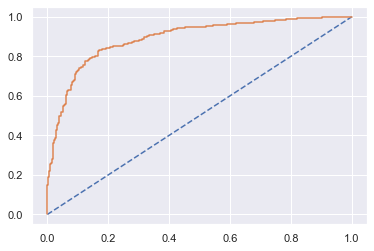

In [101]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [102]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [133]:
LDA_metrics = classification_report( y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][1],2)
LDA_test_recall=round(df.loc["1"][2],2)
LDA_test_f1=round(df.loc["1"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.9
LDA_test_recall  0.87
LDA_test_f1  0.85


AUC: 0.888


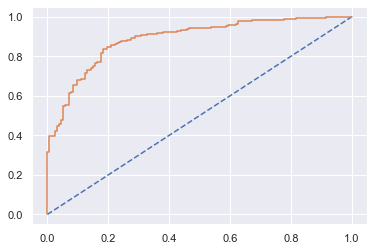

In [134]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>Boosting

In [108]:
from sklearn.ensemble import AdaBoostClassifier

In [109]:
clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,y_train)
y_pred=clfADB.predict(X_train)
model_scoreADB = clfADB.score(X_train, y_train)
print(model_scoreADB)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [110]:
ClfADB_metrics=classification_report(y_train, y_pred,output_dict=True)
df=pd.DataFrame(ClfADB_metrics).transpose()
ClfADB_train_precision=round(df.loc["1"][1],2)
ClfADB_train_recall=round(df.loc["1"][2],2)
ClfADB_train_f1=round(df.loc["1"][0],2)
print ('ClfADB_train_precision ',ClfADB_train_precision)
print ('ClfADB_train_recall ',ClfADB_train_recall)
print ('ClfADB_train_f1 ',ClfADB_train_f1)

ClfADB_train_precision  0.91
ClfADB_train_recall  0.9
ClfADB_train_f1  0.88


AUC: 0.915


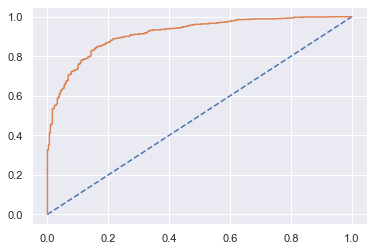

In [142]:
# predict probabilities
probs = clfADB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [111]:
y_pred=clfADB.predict(X_test)
model_scoreADB = clfADB.score(X_test, y_test)
print(model_scoreADB)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [112]:
ClfADB_metrics=classification_report(y_test, y_pred,output_dict=True)
df=pd.DataFrame(ClfADB_metrics).transpose()
ClfADB_test_precision=round(df.loc["1"][1],2)
ClfADB_test_recall=round(df.loc["1"][2],2)
ClfADB_test_f1=round(df.loc["1"][0],2)
print ('ClfADB_test_precision ',ClfADB_test_precision)
print ('ClfADB_test_recall ',ClfADB_test_recall)
print ('ClfADB_test_f1 ',ClfADB_test_f1)

ClfADB_test_precision  0.88
ClfADB_test_recall  0.86
ClfADB_test_f1  0.84


AUC: 0.877


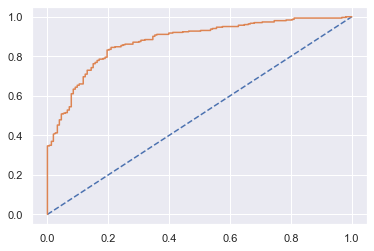

In [113]:
# predict probabilities
probs = clfADB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [115]:
RF_metrics=classification_report(y_train, y_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_train_precision=round(df.loc["1"][1],2)
RF_train_recall=round(df.loc["1"][2],2)
RF_train_f1=round(df.loc["1"][0],2)
print ('RF_train_precision ',RF_train_precision)
print ('RF_train_recall ',RF_train_recall)
print ('RF_train_f1 ',RF_train_f1)

RF_train_precision  1.0
RF_train_recall  1.0
RF_train_f1  1.0


AUC: 1.000


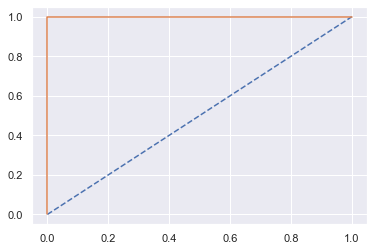

In [116]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [117]:
y_test_predict = RF_model.predict(X_test)
model_score =RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[105  48]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [143]:
RF_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_test_precision=round(df.loc["1"][1],2)
RF_test_recall=round(df.loc["1"][2],2)
RF_test_f1=round(df.loc["1"][0],2)
print ('RF_test_precision ',RF_test_precision)
print ('RF_test_recall ',RF_test_recall)
print ('RF_test_f1 ',RF_test_f1)

RF_test_precision  0.9
RF_test_recall  0.87
RF_test_f1  0.85


AUC: 0.895


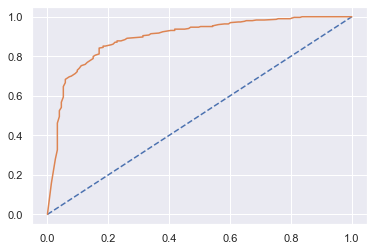

In [119]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>Bagging (Random Forest)

In [120]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [121]:

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [122]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators='warn',
                                                        n_jobs=None,
    

In [123]:
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9670122525918945
[[278  29]
 [  6 748]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



AUC: 0.997


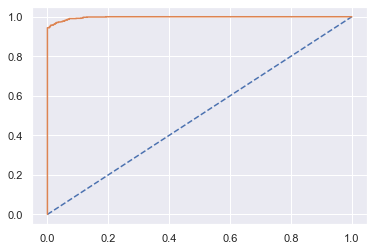

In [124]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [125]:
y_test_predict = Bagging_model.predict(X_test)
model_score =Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[103  50]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



AUC: 0.896


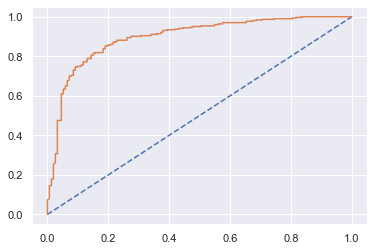

In [126]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>XGBoost

In [127]:
import xgboost as xgb
clfXGB=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
clfXGB.fit(X_train, y_train)
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

0.8416588124410933
[[210  97]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       307
           1       0.88      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [128]:
clfXGB_metrics=classification_report(y_train, y_pred,output_dict=True)
df=pd.DataFrame(clfXGB_metrics).transpose()
clfXGB_train_precision=round(df.loc["1"][1],2)
clfXGB_train_recall=round(df.loc["1"][2],2)
clfXGB_train_f1=round(df.loc["1"][0],2)
print ('clfXGB_train_precision ',clfXGB_train_precision)
print ('clfXGB_train_recall ',clfXGB_train_recall)
print ('clfXGB_train_f1 ',clfXGB_train_f1)

clfXGB_train_precision  0.91
clfXGB_train_recall  0.89
clfXGB_train_f1  0.88


AUC: 0.899


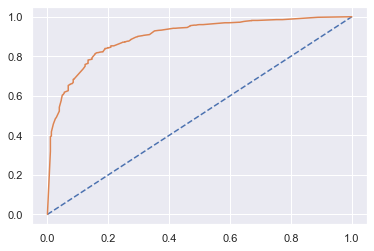

In [129]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [130]:

y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8377192982456141
[[104  49]
 [ 25 278]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       153
           1       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



In [131]:
clfXGB_metrics=classification_report(y_test, y_pred,output_dict=True)
df=pd.DataFrame(clfXGB_metrics).transpose()
clfXGB_test_precision=round(df.loc["1"][1],2)
clfXGB_test_recall=round(df.loc["1"][2],2)
clfXGB_test_f1=round(df.loc["1"][0],2)
print ('clfXGB_test_precision ',clfXGB_test_precision)
print ('clfXGB_test_recall ',clfXGB_test_recall)
print ('clfXGB_test_f1 ',clfXGB_test_f1)

clfXGB_test_precision  0.92
clfXGB_test_recall  0.88
clfXGB_test_f1  0.85


AUC: 0.887


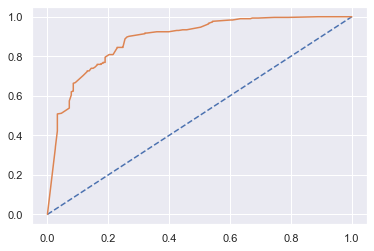

In [132]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [148]:
index=['Recall','Precision','F1 Score']
data = pd.DataFrame({'NB Train':[NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[NB_test_recall,NB_test_precision,NB_test_f1],
       'Random Forest Train':[RF_train_recall,RF_train_precision,RF_train_f1],
        'Random Forest Test':[RF_test_recall,RF_test_precision,RF_test_f1],
       'Logistic Regression Train':[LR_train_recall,LR_train_precision,LR_train_f1],
        'Logistic Regression Test':[LR_test_recall,LR_test_precision,LR_test_f1],
        'Decision Tree Train':[DT_train_recall,DT_train_precision,DT_train_f1],
        'Decision Tree Test':[DT_test_recall,DT_test_precision,DT_test_f1],
        'KNN Train':[KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'SVM Train':[SVM_train_recall,SVM_train_precision,SVM_train_f1],
        'SVM Test':[SVM_test_recall,SVM_test_precision,SVM_test_f1],
        'LDA Train':[LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'Ada Booster Train':[ClfADB_train_recall,ClfADB_train_precision,ClfADB_train_f1],
        'Ada Booster Test':[ClfADB_test_recall,ClfADB_test_precision,ClfADB_test_f1]},index=index)
round(data,2)

,NB Train,NB Test,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test,Decision Tree Train,Decision Tree Test,KNN Train,KNN Test,SVM Train,SVM Test,LDA Train,LDA Test,Ada Booster Train,Ada Booster Test
Recall,0.88,0.87,1.0,0.87,0.89,0.87,1.0,0.85,0.90,0.87,0.89,0.88,1.0,0.87,0.90,0.86
Precision,0.89,0.90,1.0,0.90,0.92,0.88,1.0,0.85,0.91,0.89,0.92,0.91,1.0,0.90,0.91,0.88
F1 Score,0.88,0.85,1.0,0.85,0.86,0.86,1.0,0.84,0.89,0.86,0.86,0.86,1.0,0.85,0.88,0.84


<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><Font color='Blue'/>Cross Validation

In [137]:
from sklearn.model_selection import cross_val_score
clfCVRF = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clfCVRF, X_train, y_train, cv=10)
scores

array([0.8411215 , 0.81308411, 0.82242991, 0.81308411, 0.88679245,
       0.81132075, 0.82075472, 0.80952381, 0.77142857, 0.82857143])

In [141]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using clfCVR:',scores)
print("Variance of clfCVR accuracies:",scores.var())

Accuracy: Final mean:82.181%, Final standard deviation:(2.756%)
Accuracies from each of the 5 folds using clfCVR: [0.8411215  0.81308411 0.82242991 0.81308411 0.88679245 0.81132075
 0.82075472 0.80952381 0.77142857 0.82857143]
Variance of clfCVR accuracies: 0.0007594413162868666
